In [1]:
# imports

import pandas as pd
import numpy as np
import pytz

from asgiref.sync import sync_to_async
import pathlib

import os, time
import datetime
import pytz
import json
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt 
%matplotlib inline
plt.style.use('fivethirtyeight')
from datetime import datetime
from numpy import NaN


# basic settings

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', None)
timezone_str = 'Asia/Kolkata'
localtz = pytz.timezone(timezone_str)

In [2]:
df = pd.read_csv("/home/julian/stocks-sept-2020/core/stocks_data_2020_till_2020_09_03.csv/stocks_data_2020_till_2020_09_03.csv",
                 skiprows=900000,
                 nrows=1037084)
df.columns = ['id','timestamp','open_price','high_price','low_price','close_price','volume','scrip_id']
print(df.shape)
df.head()

(1037084, 8)


,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
0,1837649,2020-06-12 10:41:00+05:30,565.85,566.45,565.40,566.45,13906,51
1,1853024,2020-06-12 10:41:00+05:30,465.35,466.10,465.35,465.95,8441,52
2,1868399,2020-06-12 10:41:00+05:30,915.50,916.65,915.50,916.25,4166,53
3,1883774,2020-06-12 10:41:00+05:30,1365.95,1366.80,1365.90,1366.40,944,54
4,1899150,2020-06-12 10:41:00+05:30,2455.40,2456.00,2452.95,2453.65,747,55


In [3]:
df.tail()

,id,timestamp,open_price,high_price,low_price,close_price,volume,scrip_id
1037079,910769,2020-08-12 09:49:00+05:30,1733.10,1733.95,1731.4,1731.60,2582,54
1037080,926519,2020-08-12 09:49:00+05:30,2882.00,2882.85,2879.0,2879.00,5730,55
1037081,942269,2020-08-12 09:49:00+05:30,11264.65,11266.20,11263.5,11264.65,26775,56
1037082,958019,2020-08-12 09:49:00+05:30,2132.50,2132.50,2131.0,2131.10,49995,57
1037083,973726,2020-08-12 09:49:00+05:30,1270.00,1270.00,1270.0,1270.00,0,58


In [4]:
df = df[:500000]

In [5]:
# to get data according to scrip_id

def get_df_co(df,scripid):
    df_co = df.loc[df['scrip_id'] == scripid]

    df_co.reset_index(inplace=True)

    df_co.drop(['index','id'],axis=1, inplace=True)

    for i in range(len(df_co)):
        df_co['timestamp'][i] = df_co['timestamp'][i][:-6]

    df_co['timestamp'] = pd.to_datetime(df_co['timestamp'])

    df_co.set_index('timestamp',inplace=True)

    return df_co

In [6]:
# Reliance Stocks

df_rel = get_df_co(df,5)
print(df_rel.shape)
df_rel.head()

(7779, 6)


,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-06-12 10:42:00,1532.90,1533.60,1530.45,1530.75,68012,5
2020-06-12 10:43:00,1531.00,1531.45,1529.50,1530.05,33810,5
2020-06-12 10:44:00,1530.00,1530.75,1529.15,1529.15,34734,5
2020-06-12 10:45:00,1529.15,1529.85,1528.05,1528.70,32074,5
2020-06-12 10:46:00,1528.50,1530.25,1528.00,1529.10,63384,5


In [7]:
df_rel.tail()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-07-10 15:16:00,1876.65,1877.60,1876.00,1877.20,148313,5
2020-07-10 15:17:00,1876.70,1877.50,1876.20,1877.05,85571,5
2020-07-10 15:18:00,1877.15,1877.85,1876.55,1877.10,67329,5
2020-07-10 15:19:00,1877.25,1878.80,1877.00,1878.70,85145,5
2020-07-10 15:20:00,1878.35,1880.20,1877.25,1879.30,165945,5


In [8]:
def get_df_closeprice(df_co,name_of_co):
    df_close_co = pd.DataFrame()
    df_close_co[name_of_co] = df_co['close_price'].values
    return df_close_co

df_close_rel = get_df_closeprice(df_rel,"Reliance")
df_close_rel.head()

,Reliance
0,1530.75
1,1530.05
2,1529.15
3,1528.70
4,1529.10


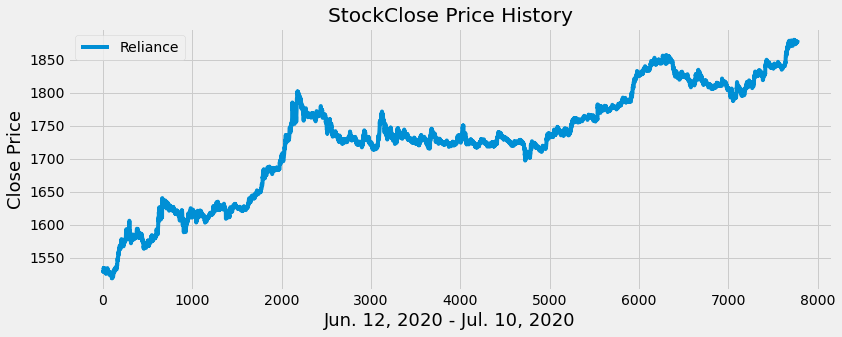

In [9]:
# Visually Show The Stock Prices

def visual_stock(df_close_co):
    title = 'StockClose Price History'

    my_stocks = df_close_co

    plt.figure(figsize=(12.2,4.5)) 
    # Loop through each stock and plot the Close price for each day
    for c in my_stocks.columns.values:
      plt.plot(my_stocks[c],  label=c)

    plt.title(title)
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020',fontsize=18)
    plt.ylabel('Close Price',fontsize=18)
    plt.legend(my_stocks.columns.values, loc='upper left')
    plt.show()

visual_stock(df_close_rel)

In [10]:
def get_ma(df_close_co,small,large):
    #Create the small simple moving average
    SMA = df_close_co.rolling(window=small).mean()

    #Create the long simple moving average
    LMA = df_close_co.rolling(window=large).mean()
    return SMA,LMA

SMA,LMA = get_ma(df_close_rel,60,180)

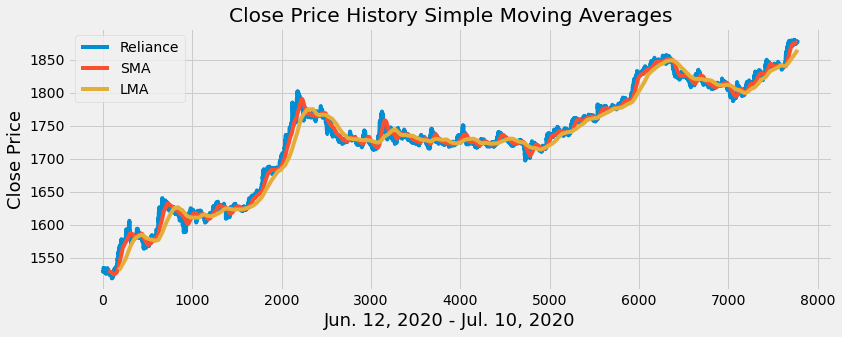

In [11]:
# Visually Show The Stock and The Moving Averages

def visual_movavg(df_close_co,co_name):
    title = 'Close Price History Simple Moving Averages'

    my_stocks = df_close_co

    plt.figure(figsize=(12.2,4.5))
    plt.plot( my_stocks[co_name],  label=co_name)
    plt.plot( SMA[co_name],  label='SMA')
    plt.plot( LMA[co_name],  label='LMA')

    plt.title(title)
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020',fontsize=18)
    plt.ylabel('Close Price',fontsize=18)
    plt.legend( loc='upper left')
    plt.show()

visual_movavg(df_close_rel,"Reliance")

In [12]:
# Function to signal when to buy and sell an asset

def buy_sell(signal,co_name):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
  for i in range(0,len(signal)):
    #if SMA > LMA  then buy else sell
      if signal['SMA'][i] > signal['LMA'][i]:
        if flag != 1:
          sigPriceBuy.append(signal[co_name][i])
          sigPriceSell.append(np.nan)
          flag = 1
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('Buy')
      elif signal['SMA'][i] < signal['LMA'][i]:
        if flag != 0:
          sigPriceSell.append(signal[co_name][i])
          sigPriceBuy.append(np.nan)
          flag = 0
        else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
        #print('sell')
      else: #Handling nan values
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
  
  return (sigPriceBuy, sigPriceSell)

In [13]:
# get signal df i.e df telling when to buy/sel

def get_signal(df_close_co,co_name,SMA,LMA):
    signal = pd.DataFrame(index=df_close_co[co_name].index)
    signal[co_name] = df_close_co[co_name]
    
    signal['SMA'] = SMA[co_name]
    signal['LMA'] = LMA[co_name]
    
    x = buy_sell(signal,co_name)
    signal['Buy_Signal_Price'] = x[0]
    signal['Sell_Signal_Price'] = x[1]
    
    return signal

signal = get_signal(df_close_rel,"Reliance",SMA,LMA)
signal.head()    

,Reliance,SMA,LMA,Buy_Signal_Price,Sell_Signal_Price
0,1530.75,NaN,NaN,NaN,NaN
1,1530.05,NaN,NaN,NaN,NaN
2,1529.15,NaN,NaN,NaN,NaN
3,1528.70,NaN,NaN,NaN,NaN
4,1529.10,NaN,NaN,NaN,NaN


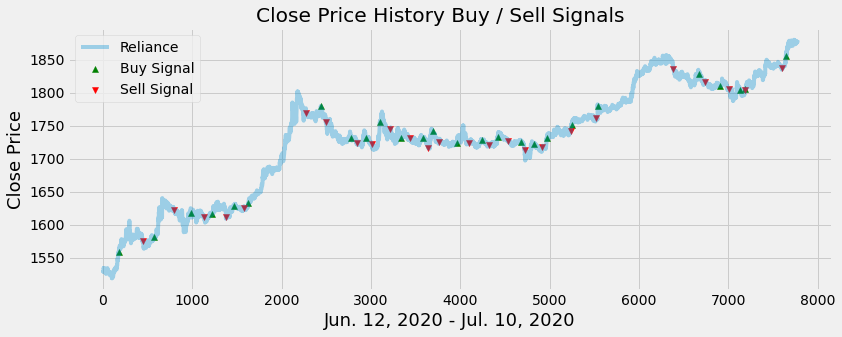

In [14]:
# Visually Show The Stock buy and sell signals

def visual_signal(signal,co_name):
    title = 'Close Price History Buy / Sell Signals   '

    my_stocks = signal
    ticker = co_name

    plt.figure(figsize=(12.2,4.5)) 
    plt.scatter(my_stocks.index, my_stocks['Buy_Signal_Price'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
    plt.scatter(my_stocks.index, my_stocks['Sell_Signal_Price'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
    plt.plot( my_stocks[ticker],  label=ticker, alpha = 0.35)
    # plt.plot( my_stocks['SMA30'],  label='SMA30', alpha = 0.35)
    # plt.plot( my_stocks['SMA100'],  label='SMA100', alpha = 0.35)
    plt.title(title)
    plt.xlabel('Jun. 12, 2020 - Jul. 10, 2020',fontsize=18)
    plt.ylabel('Close Price',fontsize=18)
    plt.legend( loc='upper left')
    plt.show()

visual_signal(signal,"Reliance")

In [15]:
BROKERAGES = {
    "zerodha": {
        "intraday": {
            "buy": {
                "base": 0.0003,
                "stt": 0,
                "exchange txn charges": 0.0000325,
                "gst": 0.00006,
                "sebi": 0.0000005,
                "stamp duty": 0.00003
            },
            "sell": {
                "base": 0.0003,
                "stt": 0.00025,
                "exchange txn charges": 0.0000325,
                "gst": 0.00006,
                "sebi": 0.0000005,
                "stamp duty": 0
            }
        }
    }
}

In [16]:
# calculate brokerage
    
def calculate_brokerage(side, txn_type, price, broker):
    current_brokerages_dict=BROKERAGES[broker][txn_type]
    brokerages = 0
    for head, value in current_brokerages_dict[side].items():
        brokerages += price*value
    return brokerages

In [17]:
# get transaction table

def get_transctable(df_co,signal):
    transaction_df = pd.DataFrame(columns=
                              [
                               'scrip',
                               'timestamp',
                               'buy/sell',
                               'price',
                               'brokerage',
                               'qtystock',
                               'profit',
                               'cum_profit',
                               'pab',
                               'cum_pab',
                              ]
                             ) 
    # setting up intial cols.
    transaction_df['timestamp'] = df_co.index

    transaction_df['scrip'] = df_co['scrip_id'].values

    transaction_df['price'] = df_co['close_price'].values


    transaction_df.loc[signal['Buy_Signal_Price'].notnull(),"buy/sell"] = 'buy'

    transaction_df.loc[signal['Sell_Signal_Price'].notnull(),"buy/sell"] = 'sell'



    transaction_df = transaction_df[transaction_df['buy/sell'].notnull()]

    transaction_df.reset_index(inplace=True)
    transaction_df.drop(['index'],axis=1,inplace=True)
    
    transaction_df['qtystock'] = 0


    for i in range(0,len(transaction_df)):
        # for creating brokerage col.
        transaction_df['brokerage'][i] = calculate_brokerage(transaction_df['buy/sell'][i],
                                                             'intraday',
                                                            transaction_df['price'][i],
                                                             'zerodha')

        # for creating qty col.
        if i>0:
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i-1]
        if transaction_df['buy/sell'][i] == 'buy':
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i]+1
        else:
            transaction_df['qtystock'][i] = transaction_df['qtystock'][i]-1

        # for creating profit col
        if (i%2 != 0):
            if transaction_df['buy/sell'][i] == 'sell':
                transaction_df['profit'][i] = transaction_df['price'][i] - transaction_df["price"][i-1]
            else:
                transaction_df['profit'][i] = transaction_df['price'][i-1] - transaction_df["price"][i]
        else:
            transaction_df['profit'][i] = 0


    transaction_df['cum_profit'] = 0.0
    transaction_df['pab'] = 0.0
    transaction_df['cum_pab'] = 0.0

    # for creating cum_profit col.
    for i in range(1,len(transaction_df)):
        transaction_df['cum_profit'][i] = transaction_df['cum_profit'][i-1] + transaction_df['profit'][i]

    # for creating pab col.   
    transaction_df['pab'] = transaction_df['profit'] - transaction_df['brokerage']

    # for creating cum_pab col.
    transaction_df['cum_pab'][0] = transaction_df['pab'][0]
    for i in range(1,len(transaction_df)):
        transaction_df['cum_pab'][i] = transaction_df['cum_pab'][i-1] + transaction_df['pab'][i]
    
    return transaction_df

In [18]:
transaction_df = get_transctable(df_rel,signal)
transaction_df

,scrip,timestamp,buy/sell,price,brokerage,qtystock,profit,cum_profit,pab,cum_pab
0,5,2020-06-12 13:41:00,buy,1558.60,0.659288,1,0,0.00,-0.659288,-0.659288
1,5,2020-06-15 11:53:00,sell,1575.20,1.01285,0,16.6,16.60,15.5871,14.927859
2,5,2020-06-15 13:57:00,buy,1581.00,0.668763,1,0,16.60,-0.668763,14.259096
3,5,2020-06-16 11:31:00,sell,1622.00,1.04295,0,41,57.60,39.9571,54.216150
4,5,2020-06-16 14:40:00,buy,1618.00,0.684414,1,0,57.60,-0.684414,53.531736
5,5,2020-06-17 10:45:00,sell,1611.00,1.03587,0,-7,50.60,-8.03587,45.495863
6,5,2020-06-17 12:15:00,buy,1615.40,0.683314,1,0,50.60,-0.683314,44.812548
7,5,2020-06-17 14:59:00,sell,1612.00,1.03652,0,-3.4,47.20,-4.43652,40.376032
8,5,2020-06-18 10:13:00,buy,1628.05,0.688665,1,0,47.20,-0.688665,39.687367
9,5,2020-06-18 11:58:00,sell,1624.90,1.04481,0,-3.15,44.05,-4.19481,35.492557


In [19]:
df_ind = get_df_co(df,2)
df_ind.head()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-06-12 10:42:00,492.85,493.20,492.50,492.90,82581,2
2020-06-12 10:43:00,492.90,493.05,492.20,492.70,52121,2
2020-06-12 10:44:00,492.95,493.00,492.45,492.85,58177,2
2020-06-12 10:45:00,492.90,492.95,492.10,492.15,35640,2
2020-06-12 10:46:00,492.30,492.40,491.25,491.65,56398,2


In [20]:
df_ind.tail()

,open_price,high_price,low_price,close_price,volume,scrip_id
timestamp,,,,,,
2020-07-10 15:16:00,538.15,538.60,536.55,537.50,197918,2
2020-07-10 15:17:00,537.60,538.50,537.10,538.20,90304,2
2020-07-10 15:18:00,538.45,540.85,538.10,540.35,260815,2
2020-07-10 15:19:00,540.35,540.65,538.55,539.20,131566,2
2020-07-10 15:20:00,539.20,540.00,539.05,539.05,70185,2


In [21]:
df_close_ind = get_df_closeprice(df_ind,"Indusind")
df_close_ind.head()

,Indusind
0,492.90
1,492.70
2,492.85
3,492.15
4,491.65


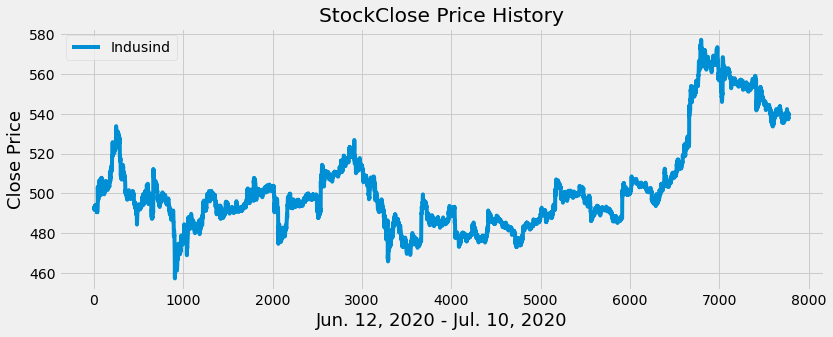

In [22]:
visual_stock(df_close_ind)

In [23]:
SMA,LMA = get_ma(df_close_ind,60,180)

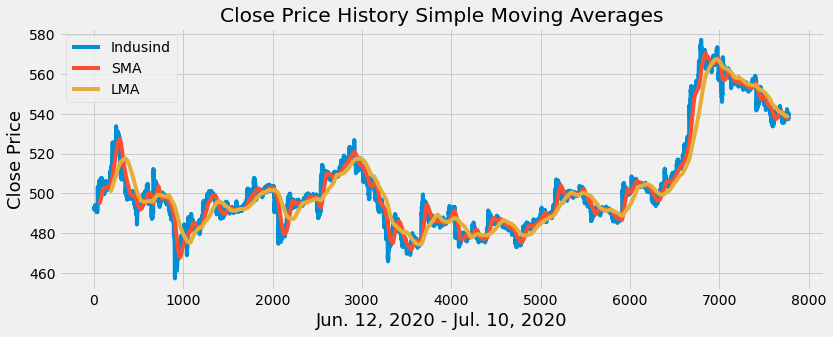

In [24]:
visual_movavg(df_close_ind,'Indusind')

In [25]:
signal_ind = get_signal(df_close_ind,"Indusind",SMA,LMA)
signal_ind.head()

,Indusind,SMA,LMA,Buy_Signal_Price,Sell_Signal_Price
0,492.90,NaN,NaN,NaN,NaN
1,492.70,NaN,NaN,NaN,NaN
2,492.85,NaN,NaN,NaN,NaN
3,492.15,NaN,NaN,NaN,NaN
4,491.65,NaN,NaN,NaN,NaN


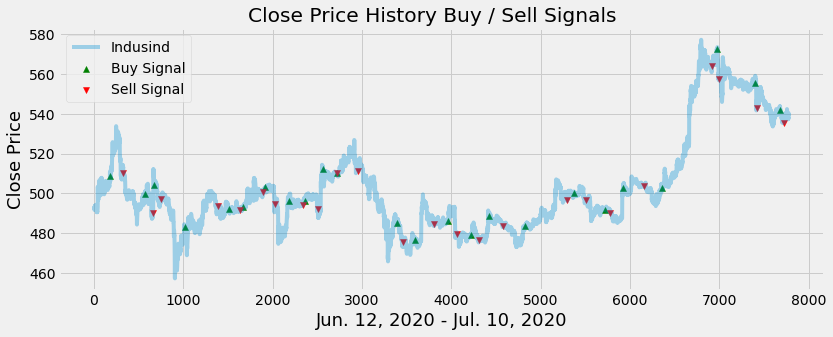

In [26]:
visual_signal(signal_ind,"Indusind")

In [27]:
transaction_df_2 = get_transctable(df_ind,signal_ind)
transaction_df_2

,scrip,timestamp,buy/sell,price,brokerage,qtystock,profit,cum_profit,pab,cum_pab
0,2,2020-06-12 13:41:00,buy,508.70,0.21518,1,0,0.00,-0.21518,-0.215180
1,2,2020-06-15 09:55:00,sell,510.25,0.328091,0,1.55,1.55,1.22191,1.006729
2,2,2020-06-15 13:58:00,buy,499.50,0.211288,1,0,1.55,-0.211288,0.795441
3,2,2020-06-15 15:25:00,sell,490.00,0.31507,0,-9.5,-7.95,-9.81507,-9.019629
4,2,2020-06-16 09:28:00,buy,504.00,0.213192,1,0,-7.95,-0.213192,-9.232821
5,2,2020-06-16 10:39:00,sell,497.20,0.3197,0,-6.8,-14.75,-7.1197,-16.352521
6,2,2020-06-16 15:15:00,buy,482.80,0.204224,1,0,-14.75,-0.204224,-16.556745
7,2,2020-06-17 15:03:00,sell,493.50,0.317321,0,10.7,-4.05,10.3827,-6.174066
8,2,2020-06-18 10:53:00,buy,491.95,0.208095,1,0,-4.05,-0.208095,-6.382161
9,2,2020-06-18 13:01:00,sell,491.75,0.316195,0,-0.2,-4.25,-0.516195,-6.898356
